In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
data = pd.read_csv('data/network_data.csv')

In [3]:
data.head()

,name,time,ByteCount,FlowCount,PacketCount,dpid
0,aggregate_stats,1549584000539375839,505220866144036,28,-1,2038063737059428907
1,aggregate_stats,1549584000618361519,290151965558460,27,-1,2037944993634475373
2,aggregate_stats,1549584000742710886,341031909558944,27,-1,2037944993634476261
3,aggregate_stats,1549584001529267179,505220885728120,28,-1,2038063737059428907
4,aggregate_stats,1549584001618192040,290151973329084,27,-1,2037944993634475373


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7803314 entries, 0 to 7803313
Data columns (total 6 columns):
name           object
time           int64
ByteCount      int64
FlowCount      int64
PacketCount    int64
dpid           int64
dtypes: int64(5), object(1)
memory usage: 357.2+ MB


In [5]:
data['time'] = pd.to_datetime(data['time'],unit='ns')

In [6]:
data.tail()

,name,time,ByteCount,FlowCount,PacketCount,dpid
7803309,aggregate_stats,2019-03-10 05:08:26.187491172,365382373224204,27,-1,2037944993634475373
7803310,aggregate_stats,2019-03-10 05:08:26.950679181,617981692855968,28,-1,2038063737059428907
7803311,aggregate_stats,2019-03-10 05:08:27.030483556,429164364052488,27,-1,2037944993634476261
7803312,aggregate_stats,2019-03-10 05:08:27.187426142,365382375469540,27,-1,2037944993634475373
7803313,aggregate_stats,2019-03-10 05:08:27.950719458,617981696843134,28,-1,2038063737059428907


In [7]:
timeseries = data['ByteCount']

In [8]:
# timeseries.rolling(12).mean().plot(label='12 mon')
# timeseries.plot()
# plt.legend()

In [9]:
grouped = data['ByteCount'].groupby(data['dpid'])

In [10]:
grouped.mean()

dpid
2037944993634475373    3.246977e+14
2037944993634476261    3.844291e+14
2038063737059428907    5.596954e+14
Name: ByteCount, dtype: float64

In [11]:
dpid1 = data['dpid'] == 2037944993634475373

In [12]:
data_dpid1 = data[dpid1]
data_dpid1.head()

,name,time,ByteCount,FlowCount,PacketCount,dpid
1,aggregate_stats,2019-02-08 00:00:00.618361519,290151965558460,27,-1,2037944993634475373
4,aggregate_stats,2019-02-08 00:00:01.618192040,290151973329084,27,-1,2037944993634475373
7,aggregate_stats,2019-02-08 00:00:02.618220910,290152028385576,27,-1,2037944993634475373
10,aggregate_stats,2019-02-08 00:00:03.618122116,290152038823560,27,-1,2037944993634475373
13,aggregate_stats,2019-02-08 00:00:04.618005071,290152090553516,27,-1,2037944993634475373


/Users/sangyun_han/timeseries/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


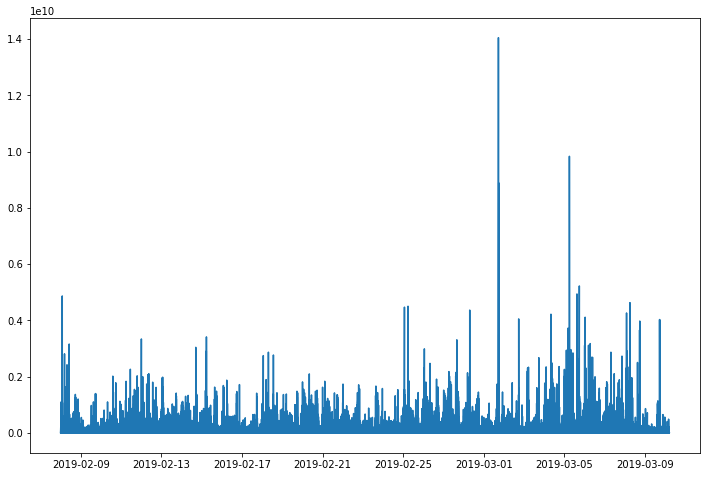

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(data_dpid1['time'], data_dpid1['ByteCount'].diff())
plt.show()

In [14]:
data_dpid1['ByteCount'].diff().head()

1            NaN
4      7770624.0
7     55056492.0
10    10437984.0
13    51729956.0
Name: ByteCount, dtype: float64

In [15]:
traffic_data = {'ds':data_dpid1['time'], 'y':data_dpid1['ByteCount'].diff()}

In [16]:
traffic_df = pd.DataFrame(traffic_data)

In [17]:
traffic_df.tail()

,ds,y
7803300,2019-03-10 05:08:23.187733445,779664.0
7803303,2019-03-10 05:08:24.187407073,1489440.0
7803306,2019-03-10 05:08:25.187444166,1210204.0
7803309,2019-03-10 05:08:26.187491172,1992704.0
7803312,2019-03-10 05:08:27.187426142,2245336.0


In [28]:
traffic_df1 = traffic_df[0:1000]
traffic_df1.tail()

,ds,y
2986,2019-02-08 00:16:35.618423571,7328600.0
2989,2019-02-08 00:16:36.618676343,5662056.0
2992,2019-02-08 00:16:37.618211341,16206928.0
2995,2019-02-08 00:16:38.618172217,13277000.0
2998,2019-02-08 00:16:39.618464454,7868416.0


In [29]:
m = Prophet()
m.fit(traffic_df1)

/Users/sangyun_han/timeseries/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future = m.make_future_dataframe(periods=10)
future.tail()

,ds
1005,2019-02-14 00:16:39.618464454
1006,2019-02-15 00:16:39.618464454
1007,2019-02-16 00:16:39.618464454
1008,2019-02-17 00:16:39.618464454
1009,2019-02-18 00:16:39.618464454


In [31]:
forecast = m.predict(future)

In [32]:
forecast[['ds', 'yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-02-08 00:00:00.618361519,2.886049e+07,-2.782402e+07,8.407591e+07
1,2019-02-08 00:00:01.618192040,2.879273e+07,-2.696613e+07,8.310702e+07
2,2019-02-08 00:00:02.618220910,2.872495e+07,-2.016033e+07,8.465563e+07
3,2019-02-08 00:00:03.618122116,2.865718e+07,-2.804724e+07,8.149380e+07
4,2019-02-08 00:00:04.618005071,2.858941e+07,-2.702598e+07,7.988436e+07


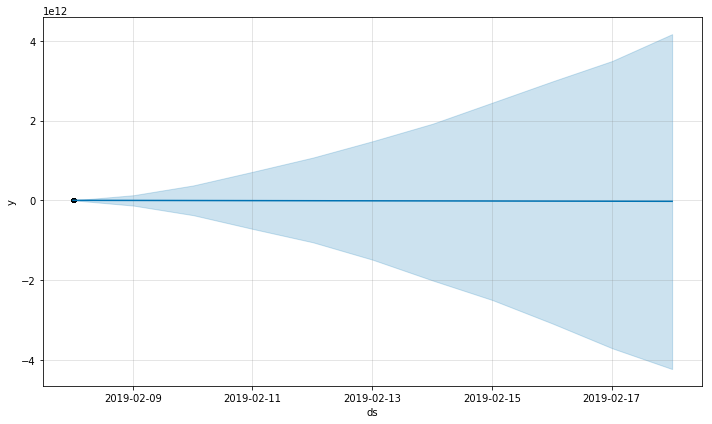

In [33]:
fig1 = m.plot(forecast)

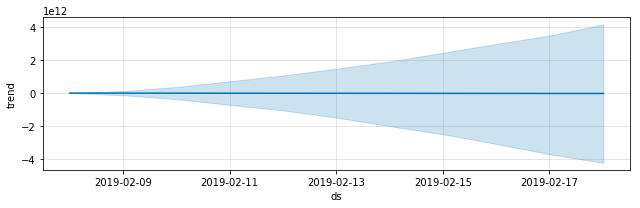

In [34]:
fig2 = m.plot_components(forecast)